In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb 
import catboost as catb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

np.__version__

'1.26.4'

In [3]:
import os

root = '../parsing_results/csv'
files = os.listdir('../parsing_results/csv')

df_0 = pd.read_csv(f'{root}/{files[0]}')
df_1 = pd.read_csv(f'{root}/{files[1]}')

df_0.head()



,numrooms,sqauremeters,levels_on_building,level,price,distrcit,microdistrict,street,builtyear,ceilinghight,seller,bathroomtype,repaired
0,4,160.85,NaN,NaN,129645100,бостандыкский,NaN,лебедева 1/1,2025,3.0,новостройка,2 с/у и более,NaN
1,2,72.00,NaN,NaN,79200000,NaN,NaN,минина,2024,3.0,новостройка,2 с/у и более,NaN
2,1,38.30,NaN,NaN,25929100,жетысуский,NaN,райымбека — суюнбая,2025,3.0,новостройка,совмещенный,NaN
3,6,340.60,NaN,NaN,161785000,бостандыкский,мкр мирас,NaN,2013,3.0,новостройка,2 с/у и более,NaN
4,3,87.00,16.0,5.0,90000000,бостандыкский,NaN,гагарина проспект 124 — абая,2019,3.0,новостройка,2 с/у и более,NaN


In [4]:
df_0.shape[0]
df_0['city'] = ['Almaty'] * df_0.shape[0]
df_1['city'] = ['Astan'] * df_1.shape[0]
df = pd.concat([df_0, df_1])
df.shape

(36325, 14)

In [5]:

df.head()

,numrooms,sqauremeters,levels_on_building,level,price,distrcit,microdistrict,street,builtyear,ceilinghight,seller,bathroomtype,repaired,city
0,4,160.85,NaN,NaN,129645100,бостандыкский,NaN,лебедева 1/1,2025,3.0,новостройка,2 с/у и более,NaN,Almaty
1,2,72.00,NaN,NaN,79200000,NaN,NaN,минина,2024,3.0,новостройка,2 с/у и более,NaN,Almaty
2,1,38.30,NaN,NaN,25929100,жетысуский,NaN,райымбека — суюнбая,2025,3.0,новостройка,совмещенный,NaN,Almaty
3,6,340.60,NaN,NaN,161785000,бостандыкский,мкр мирас,NaN,2013,3.0,новостройка,2 с/у и более,NaN,Almaty
4,3,87.00,16.0,5.0,90000000,бостандыкский,NaN,гагарина проспект 124 — абая,2019,3.0,новостройка,2 с/у и более,NaN,Almaty


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 36325 entries, 0 to 18322
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   numrooms            36325 non-null  int64  
 1   sqauremeters        36325 non-null  float64
 2   levels_on_building  33866 non-null  float64
 3   level               34305 non-null  float64
 4   price               36325 non-null  int64  
 5   distrcit            35077 non-null  object 
 6   microdistrict       7823 non-null   object 
 7   street              28498 non-null  object 
 8   builtyear           36325 non-null  int64  
 9   ceilinghight        30392 non-null  float64
 10  seller              36325 non-null  object 
 11  bathroomtype        26891 non-null  object 
 12  repaired            10340 non-null  object 
 13  city                36325 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 4.2+ MB


In [7]:
df = df.drop(columns=['microdistrict', 'street'])

In [8]:
df.head()

,numrooms,sqauremeters,levels_on_building,level,price,distrcit,builtyear,ceilinghight,seller,bathroomtype,repaired,city
0,4,160.85,NaN,NaN,129645100,бостандыкский,2025,3.0,новостройка,2 с/у и более,NaN,Almaty
1,2,72.00,NaN,NaN,79200000,NaN,2024,3.0,новостройка,2 с/у и более,NaN,Almaty
2,1,38.30,NaN,NaN,25929100,жетысуский,2025,3.0,новостройка,совмещенный,NaN,Almaty
3,6,340.60,NaN,NaN,161785000,бостандыкский,2013,3.0,новостройка,2 с/у и более,NaN,Almaty
4,3,87.00,16.0,5.0,90000000,бостандыкский,2019,3.0,новостройка,2 с/у и более,NaN,Almaty


In [9]:
cat_cols = [
    'distrcit',
    'seller',
    'bathroomtype',
    'repaired'
]

num_cols = [
    'numrooms',
    'sqauremeters',
    'levels_on_building',
    'level',
    'price',
    'builtyear',
    'ceilinghight',
]

In [10]:
def barplot_col(col):
    bathroom_counts = df[col].value_counts()

    # Plot the bar plot
    plt.bar(bathroom_counts.index, bathroom_counts.values)

    # Customize the plot
    plt.title(f'{col.capitalize()}s')
    plt.xlabel(f'{col.capitalize()}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels if necessary for better readability
    # Display the plot
    plt.show()
    


In [11]:
df['bathroomtype'].value_counts()

bathroomtype
совмещенный      14191
раздельный        6512
2 с/у и более     6133
другой              51
общий                4
Name: count, dtype: int64

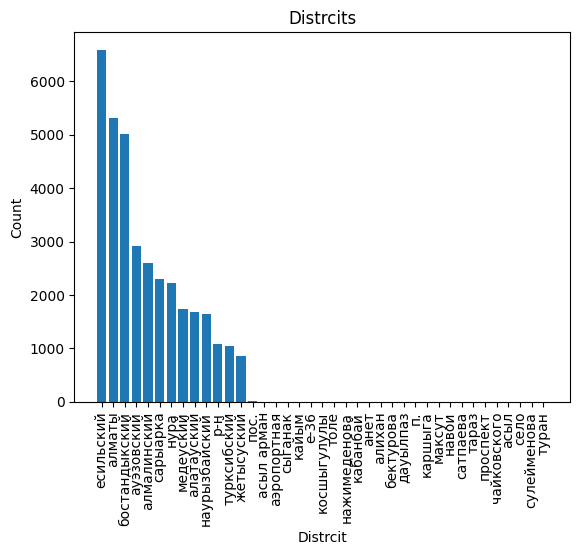

In [12]:
barplot_col('distrcit')

In [13]:
df['seller'].value_counts()

seller
новостройка            36323
хозяин недвижимости        2
Name: count, dtype: int64

In [14]:
df['distrcit'].value_counts()

distrcit
есильский        6593
алматы           5320
бостандыкский    5022
ауэзовский       2924
алмалинский      2601
сарыарка         2294
нура             2222
медеуский        1734
алатауский       1679
наурызбайский    1651
р-н              1078
турксибский      1050
жетысуский        863
пос.               13
асыл арман          4
аэропортная         3
сыганак             3
кайым               2
е-36                1
косшыгулулы         1
толе                1
нажимеденова        1
кабанбай            1
анет                1
алихан              1
бектурова           1
дауылпаз            1
п.                  1
каршыга             1
максут              1
навои               1
сатпаева            1
тараз               1
проспект            1
чайковского         1
асыл                1
село                1
сулейменова         1
туран               1
Name: count, dtype: int64